**Initial Load of Data**

In [ ]:
#Define Input Data
files = ["Talia_09281445_COCONUT_GROVE_COUNTYDATA.csv","CGROVE_AREAS.csv"]
#/content/drive/MyDrive/PROJECTS/INPUT/Talia_09281445_COCONUT_GROVE_COUNTYDATA.csv

In [ ]:
# Load Libraries
import pandas as pd
import numpy  as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/My Drive/PROJECTS/"
INPUT = PATH + "INPUT/"
OUTPUT = PATH + "OUTPUT/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read Data
if (len(files)==0):
  print ("No Data Loaded")
elif files[0][-4:]==".csv":
  for File in files:
    INPUTDATA_1YR = pd.read_csv(INPUT+File)
    INPUTDATA_1YR["FILENAME"] = File
    print(INPUTDATA_1YR.shape,end=" > ")

    if File==files[0]:
      INPUTDATA = INPUTDATA_1YR.copy()
      print("Parcels:",INPUTDATA.shape)
    else:
      INPUTDATA_AREAS = INPUTDATA_1YR.copy()
      print("Areas:",INPUTDATA_AREAS.shape)

(21850, 66) > Parcels: (21850, 66)
(14945, 3) > Areas: (14945, 3)


**Review of Variables**

In [ ]:
print(INPUTDATA.dtypes)
print("###############")
print(INPUTDATA_AREAS.dtypes)

Folio               int64
PropertyAddress    object
PropertyCity       object
PropertyZip        object
Year                int64
                    ...  
LivingSqFt          int64
ActualSqFt          int64
CRA                object
ZIPCODE             int64
FILENAME           object
Length: 66, dtype: object
###############
PARCEL20     int64
XF_TYPE     object
FILENAME    object
dtype: object


**Review of Values**

In [ ]:
# Analyze all variables:
for var in INPUTDATA.columns:
    print("Variable: ", var,end=" ")
    VALUESET = set(INPUTDATA[var])
    NumberOfUniqueValues = len(VALUESET)
#   in     (INPUTDATA[var].dtype==float):
    if not (INPUTDATA[var].dtype==object):
        print("Numeric Field. Number of Unique Values:", NumberOfUniqueValues)
        print(INPUTDATA[var].describe())
    else:
        print("Character Field. Number of Unique Values:", NumberOfUniqueValues)
        if NumberOfUniqueValues<10:
            for value in VALUESET:
                print(value)
    print()

Variable:  Folio Numeric Field. Number of Unique Values: 21850
count    2.185000e+04
mean     1.534331e+11
std      4.789313e+10
min      1.020709e+11
25%      1.411613e+11
50%      1.412137e+11
75%      1.413902e+11
max      3.412907e+11
Name: Folio, dtype: float64

Variable:  PropertyAddress Character Field. Number of Unique Values: 21257

Variable:  PropertyCity Character Field. Number of Unique Values: 2
Coral Gables
Miami

Variable:  PropertyZip Character Field. Number of Unique Values: 2549

Variable:  Year Numeric Field. Number of Unique Values: 2
count    21850.000000
mean      2021.999954
std          0.006765
min       2021.000000
25%       2022.000000
50%       2022.000000
75%       2022.000000
max       2022.000000
Name: Year, dtype: float64

Variable:  Land Numeric Field. Number of Unique Values: 3898
count    2.185000e+04
mean     3.709689e+05
std      1.525384e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.185000e+05
max      9.468423e+0

In [ ]:
#Merge datasets on Folio and rename cols to Folio and Area
AREAS = INPUTDATA_AREAS.copy()
AREAS = AREAS.rename(columns = {"PARCEL20":"Folio", "XF_TYPE":"AREA"})
INPUTDATA1 = INPUTDATA.merge(AREAS, on="Folio", how="inner")

In [ ]:
# Convert all column names into upper case
INPUTDATA1.columns = INPUTDATA1.columns.str.upper()

In [ ]:
# Upper Case all Text variables:
for var in INPUTDATA1.columns:
  print(var, end=" ")
  if INPUTDATA1[var].dtype == "object":
    print("is text, is uppercased")
    INPUTDATA1[var] = INPUTDATA1[var].str.upper()
  else: print("is numeric")
INPUTDATA1

FOLIO is numeric
PROPERTYADDRESS is text, is uppercased
PROPERTYCITY is text, is uppercased
PROPERTYZIP is text, is uppercased
YEAR is numeric
LAND is numeric
BLDG is numeric
TOTAL is numeric
ASSESSED is numeric
WVDB is numeric
HEX is numeric
GPAR is numeric
COUNTY2NDHEX is numeric
COUNTYSENIOR is numeric
COUNTYLONGTERMSENIOR is numeric
COUNTYOTHEREXEMPT is numeric
COUNTYTAXABLE is numeric
CITY2NDHEX is numeric
CITYSENIOR is numeric
CITYLONGTERMSENIOR is numeric
CITYOTHEREXEMPT is numeric
CITYTAXABLE is numeric
MILLCODE is numeric
LANDUSE is text, is uppercased
ZONING is text, is uppercased
OWNER1 is text, is uppercased
OWNER2 is text, is uppercased
MAILINGADDRESS is text, is uppercased
MAILINGCITY is text, is uppercased
MAILINGSTATE is text, is uppercased
MAILINGZIP is text, is uppercased
MAILINGCOUNTRY is text, is uppercased
LEGAL1 is text, is uppercased
LEGAL2 is text, is uppercased
LEGAL3 is text, is uppercased
LEGAL4 is text, is uppercased
LEGAL5 is text, is uppercased
LEGAL6 is t

,FOLIO,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,YEAR,LAND,BLDG,TOTAL,ASSESSED,WVDB,...,XF1,XF2,XF3,LIVINGSQFT,ACTUALSQFT,CRA,ZIPCODE,FILENAME_X,AREA,FILENAME_Y
0,141140010005,NaN,MIAMI,33133-0000,2022,805644,0,805644,805644,0,...,NaN,NaN,NaN,0,0,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,NORTH,CGROVE_AREAS.CSV
1,141140010010,3545 E FAIRVIEW ST,MIAMI,33133-4016,2022,781908,1356607,2138515,1817381,0,...,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4914,6992,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,NORTH,CGROVE_AREAS.CSV
2,141140010015,3535 E FAIRVIEW ST,MIAMI,33133-4016,2022,748328,2224862,2973190,2973190,0,...,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4914,6992,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,NORTH,CGROVE_AREAS.CSV
3,141140010020,3525 E FAIRVIEW ST,MIAMI,33133-0000,2022,745568,1280660,2026228,1845455,0,...,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF",ELEVATOR - PASSENGER,"PATIO - BRICK, TILE, FLAGSTONE",4731,7211,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,NORTH,CGROVE_AREAS.CSV
4,141140010030,3515 E FAIRVIEW ST,MIAMI,33133-0000,2022,723764,1473189,2196953,2196953,0,...,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4714,7385,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,NORTH,CGROVE_AREAS.CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14840,341290700600,95 EDGEWATER DR 206,CORAL GABLES,33133-6948,2022,0,0,213700,209117,0,...,NaN,NaN,NaN,763,763,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,OUTSIDE,CGROVE_AREAS.CSV
14841,341290700610,95 EDGEWATER DR 107,CORAL GABLES,33133-6948,2022,0,0,213700,210210,0,...,NaN,NaN,NaN,763,763,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,OUTSIDE,CGROVE_AREAS.CSV
14842,341290700620,95 EDGEWATER DR 207,CORAL GABLES,33133-6948,2022,0,0,213700,209117,0,...,NaN,NaN,NaN,763,763,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,OUTSIDE,CGROVE_AREAS.CSV
14843,341290700630,95 EDGEWATER DR 108,CORAL GABLES,33133-6948,2022,0,0,216200,137566,0,...,NaN,NaN,NaN,783,783,\n,33133,TALIA_09281445_COCONUT_GROVE_COUNTYDATA.CSV,OUTSIDE,CGROVE_AREAS.CSV


**Variable Selection**

In [ ]:
#Print Out variables that are needed for analysis:
print("KEEPVARLIST=[",end="")
for var in INPUTDATA1.columns:
  print("'"+var+"'",end="")
  if not (var==INPUTDATA1.columns[-1]):
    print(",",end="")
print("]")

KEEPVARLIST=['FOLIO','PROPERTYADDRESS','PROPERTYCITY','PROPERTYZIP','YEAR','LAND','BLDG','TOTAL','ASSESSED','WVDB','HEX','GPAR','COUNTY2NDHEX','COUNTYSENIOR','COUNTYLONGTERMSENIOR','COUNTYOTHEREXEMPT','COUNTYTAXABLE','CITY2NDHEX','CITYSENIOR','CITYLONGTERMSENIOR','CITYOTHEREXEMPT','CITYTAXABLE','MILLCODE','LANDUSE','ZONING','OWNER1','OWNER2','MAILINGADDRESS','MAILINGCITY','MAILINGSTATE','MAILINGZIP','MAILINGCOUNTRY','LEGAL1','LEGAL2','LEGAL3','LEGAL4','LEGAL5','LEGAL6','ADJUSTEDSQFT','LOTSIZE','BED','BATH','STORIES','UNITS','YEARBUILT','EFFECTIVEYEARBUILT','SALETYPE1','SALEQUAL1','SALEDATE1','SALEAMT1','SALETYPE2','SALEQUAL2','SALEDATE2','SALEAMT2','SALETYPE3','SALEQUAL3','SALEDATE3','SALEAMT3','XF1','XF2','XF3','LIVINGSQFT','ACTUALSQFT','CRA','ZIPCODE','FILENAME_X','AREA','FILENAME_Y']


In [ ]:
# Select only variables that are needed for analysis
KEEPVARLIST=['FOLIO','PROPERTYADDRESS','LAND','BLDG','TOTAL','ASSESSED','HEX',
               'LANDUSE','ZONING','OWNER1','OWNER2','MAILINGADDRESS','MAILINGSTATE','MAILINGCOUNTRY',
               'ADJUSTEDSQFT','LOTSIZE','BED','BATH','STORIES','UNITS','YEARBUILT','EFFECTIVEYEARBUILT',
               'SALETYPE1','SALEQUAL1','SALEDATE1','SALEAMT1','SALETYPE2','SALEQUAL2','SALEDATE2','SALEAMT2','SALETYPE3','SALEQUAL3','SALEDATE3','SALEAMT3',
               'XF1','XF2','XF3','LIVINGSQFT','ACTUALSQFT','AREA']

In [ ]:
# Select only selected variables for dataframe STEP1DATA
STEP1DATA = INPUTDATA1[KEEPVARLIST].copy()
STEP1DATA

,FOLIO,PROPERTYADDRESS,LAND,BLDG,TOTAL,ASSESSED,HEX,LANDUSE,ZONING,OWNER1,...,SALETYPE3,SALEQUAL3,SALEDATE3,SALEAMT3,XF1,XF2,XF3,LIVINGSQFT,ACTUALSQFT,AREA
0,141140010005,NaN,805644,0,805644,805644,0,0081 - VACANT RESIDENTIAL : VACANT LAND,0100 - SINGLE FAMILY - GENERAL,LEONARD VIDAL,...,0.0,Q,12/01/2006,825000.0,NaN,NaN,NaN,0,0,NORTH
1,141140010010,3545 E FAIRVIEW ST,781908,1356607,2138515,1817381,25000,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,ANTONIO SOLER JTRS,...,2.0,Q,08/01/2004,1290000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4914,6992,NORTH
2,141140010015,3535 E FAIRVIEW ST,748328,2224862,2973190,2973190,0,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,CHRISTOPHER CLARK,...,0.0,Q,06/01/2007,1575000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4914,6992,NORTH
3,141140010020,3525 E FAIRVIEW ST,745568,1280660,2026228,1845455,0,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,FUTURE TECHNOLOGY A CO,...,0.0,Q,10/01/2004,1000000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF",ELEVATOR - PASSENGER,"PATIO - BRICK, TILE, FLAGSTONE",4731,7211,NORTH
4,141140010030,3515 E FAIRVIEW ST,723764,1473189,2196953,2196953,0,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,BAYSHORE AND FAIRVIEW LLC,...,0.0,Q,09/01/2003,1250000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4714,7385,NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14840,341290700600,95 EDGEWATER DR 206,0,0,213700,209117,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,OCINO LLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,763,OUTSIDE
14841,341290700610,95 EDGEWATER DR 107,0,0,213700,210210,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,MADTOP INVESTMENTS LLC,...,12.0,U,06/03/2013,271200.0,NaN,NaN,NaN,763,763,OUTSIDE
14842,341290700620,95 EDGEWATER DR 207,0,0,213700,209117,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,ROCHAVERA LLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,763,OUTSIDE
14843,341290700630,95 EDGEWATER DR 108,0,0,216200,137566,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,THOMAS A ZIEGENHARDT,...,0.0,Q,12/01/2005,249000.0,NaN,NaN,NaN,783,783,OUTSIDE


**Data Cleaning**

In [ ]:
# Processing Missing Values
for var in STEP1DATA.columns:
  if (STEP1DATA[var].dtype==object):
    STEP1DATA[var] = STEP1DATA[var].fillna("")
  elif (var in ['LAND','BLDG','TOTAL','ASSESSED','HEX','ADJUSTEDSQFT','LOTSIZE',
                'BED','BATH','STORIES','UNITS','YEARBUILT','EFFECTIVEYEARBUILT',
                'SALEAMT1','SALEAMT2','SALEAMT3','LIVINGSQFT','ACTUALSQFT','AREA']):
    STEP1DATA[var] = STEP1DATA[var].fillna(0)

STEP1DATA

,FOLIO,PROPERTYADDRESS,LAND,BLDG,TOTAL,ASSESSED,HEX,LANDUSE,ZONING,OWNER1,...,SALETYPE3,SALEQUAL3,SALEDATE3,SALEAMT3,XF1,XF2,XF3,LIVINGSQFT,ACTUALSQFT,AREA
0,141140010005,,805644,0,805644,805644,0,0081 - VACANT RESIDENTIAL : VACANT LAND,0100 - SINGLE FAMILY - GENERAL,LEONARD VIDAL,...,0.0,Q,12/01/2006,825000.0,,,,0,0,NORTH
1,141140010010,3545 E FAIRVIEW ST,781908,1356607,2138515,1817381,25000,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,ANTONIO SOLER JTRS,...,2.0,Q,08/01/2004,1290000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4914,6992,NORTH
2,141140010015,3535 E FAIRVIEW ST,748328,2224862,2973190,2973190,0,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,CHRISTOPHER CLARK,...,0.0,Q,06/01/2007,1575000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4914,6992,NORTH
3,141140010020,3525 E FAIRVIEW ST,745568,1280660,2026228,1845455,0,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,FUTURE TECHNOLOGY A CO,...,0.0,Q,10/01/2004,1000000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF",ELEVATOR - PASSENGER,"PATIO - BRICK, TILE, FLAGSTONE",4731,7211,NORTH
4,141140010030,3515 E FAIRVIEW ST,723764,1473189,2196953,2196953,0,0101 - RESIDENTIAL - SINGLE FAMILY : 1 UNIT,0100 - SINGLE FAMILY - GENERAL,BAYSHORE AND FAIRVIEW LLC,...,0.0,Q,09/01/2003,1250000.0,"POOL 6' RES BETTER 3-8' DPTH, TILE 250-649 SF","PATIO - BRICK, TILE, FLAGSTONE",WOOD FENCE,4714,7385,NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14840,341290700600,95 EDGEWATER DR 206,0,0,213700,209117,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,OCINO LLC,...,NaN,,,0.0,,,,763,763,OUTSIDE
14841,341290700610,95 EDGEWATER DR 107,0,0,213700,210210,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,MADTOP INVESTMENTS LLC,...,12.0,U,06/03/2013,271200.0,,,,763,763,OUTSIDE
14842,341290700620,95 EDGEWATER DR 207,0,0,213700,209117,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,ROCHAVERA LLC,...,NaN,,,0.0,,,,763,763,OUTSIDE
14843,341290700630,95 EDGEWATER DR 108,0,0,216200,137566,0,0407 - RESIDENTIAL - TOTAL VALUE : CONDOMINIUM...,5000 - HOTELS & MOTELS - GENERAL,THOMAS A ZIEGENHARDT,...,0.0,Q,12/01/2005,249000.0,,,,783,783,OUTSIDE


**Feature Generation**

In [ ]:
STEP2DATA = STEP1DATA.copy()
# Feature Generation / Transformations

# Define Property Market Value (TOTAL * 1.25)
STEP2DATA["MARKETVAL"] = STEP2DATA["TOTAL"].apply(lambda x: x*1.25)
# Define Property Type
STEP2DATA["PROPTYPE"] = np.where(STEP2DATA["LANDUSE"].str[:2]=="01","SINGLE",
                        np.where(STEP2DATA["LANDUSE"].str[:2].isin(["04","05"]),"CONDO",
                        np.where(STEP2DATA["LANDUSE"].str[:3].isin(["039"]),"HOTEL",
                        np.where(STEP2DATA["LANDUSE"].str[:2].isin(["03","08"]),
                                  np.where(STEP2DATA["UNITS"]<=4,"MULT-RESI","MULTI-COMM"),"OTHER"))))

# Define if Property has a pool
STEP2DATA["POOL"] = np.where(STEP2DATA["XF1"].str.upper().str.find("POOL")>=0,1,
                    np.where(STEP2DATA["XF2"].str.upper().str.find("POOL")>=0,1,
                    np.where(STEP2DATA["XF3"].str.upper().str.find("POOL")>=0,1,0)))

# Define if Company (True or False)
ENDINGS = ["LIMITED LIABILITY COMPANY","LLLC","LLC"," LC","LCC",
            "LIMITED PARTNERSHIP","LIMITED","LTD","LLLP","LLP","PLLC","PLC"," PL"," LP","PC",
            "PROFFESIONAL ASSOCIATION"," PA",
            "INCORPORATION","INCORPORATED","CORPORATION","COMPANY"," INC","CORP"," CO"]
STEP2DATA["COMPANY"] = False
for end in ENDINGS:
  endlen = len(end)
  STEP2DATA["COMPANY"] =  np.logical_or(STEP2DATA["COMPANY"],
                                        STEP2DATA["OWNER1"].str[-endlen:]==end)
  STEP2DATA["COMPANY"] =  np.logical_or(STEP2DATA["COMPANY"],
                                        STEP2DATA["OWNER2"].str[-endlen:]==end)

STEP2DATA["COMPANY"] = np.where(STEP2DATA["COMPANY"],1,0)

# Define last sale amount and last sale date
STEP2DATA["LASTQSALEDT"] = 0
STEP2DATA["LASTQSALEAMT"] = 0

for I in ("1","2","3"):

  STEP2DATA["SALEDT"+I] = np.where(STEP2DATA["SALEDATE"+I]=="","0",
                                    STEP2DATA["SALEDATE"+I].str[6:10] +
                                    STEP2DATA["SALEDATE"+I].str[0:2] +
                                    STEP2DATA["SALEDATE"+I].str[3:5])
  STEP2DATA["SALEDT"+I] = STEP2DATA["SALEDT"+I].astype(int)

  STEP2DATA["LASTQSALEAMT"] = np.where((STEP2DATA["LASTQSALEDT"]==0) & (STEP2DATA["SALEQUAL"+I]=="Q"),
              STEP2DATA["SALEAMT"+I],STEP2DATA["LASTQSALEAMT"])

  STEP2DATA["LASTQSALEDT"] = np.where((STEP2DATA["LASTQSALEDT"]==0) & (STEP2DATA["SALEQUAL"+I]=="Q"),
              STEP2DATA["SALEDT"+I],STEP2DATA["LASTQSALEDT"])


**Descriptive Data Analysis**

Total Property Counts by Area

In [ ]:
print(STEP2DATA['AREA'].value_counts())
print("+++")
print(STEP2DATA['PROPTYPE'].value_counts())
print("+++")
print(pd.crosstab(STEP2DATA['AREA'],STEP2DATA['PROPTYPE']))

CENTRAL    7211
OUTSIDE    4267
NORTH      1696
SOUTH      1671
Name: AREA, dtype: int64
+++
CONDO         6433
SINGLE        4799
OTHER         2144
MULT-RESI     1376
MULTI-COMM      93
Name: PROPTYPE, dtype: int64
+++
PROPTYPE  CONDO  MULT-RESI  MULTI-COMM  OTHER  SINGLE
AREA                                                 
CENTRAL    4124        270          56   1561    1200
NORTH       715         20           0     85     876
OUTSIDE    1558       1031          33    336    1309
SOUTH        36         55           4    162    1414


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PROPERTY COUNTS BY AREA')

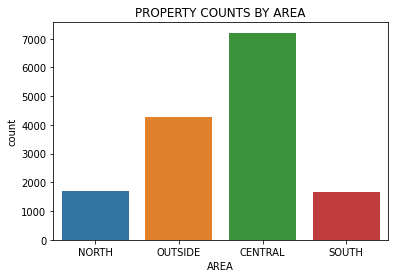

In [ ]:
sns.countplot(STEP2DATA["AREA"]).set_title("PROPERTY COUNTS BY AREA")


# Example: https://www.kaggle.com/code/omarayman/categorical-data-analysis-in-python

Average Grove Property by Type (Single, Condo, Multi)

In [ ]:
#Remove OUTSIDE area for more in depth analysis
GROVE = STEP2DATA.copy()
GROVE = GROVE[GROVE["AREA"] != "OUTSIDE"]

1. Average Single Family Property in the Grove

In [ ]:
#Select single properties
SINGLE = GROVE[GROVE["PROPTYPE"]=="SINGLE"]

In [ ]:
#Use median of (skewed) continous numeric columns and mode of categorical columns
#keepcols = [ 'LAND', 'BLDG', 'TOTAL', 'ASSESSED', 'HEX','LANDUSE', 'ZONING',
            # 'MAILINGSTATE', 'MAILINGCOUNTRY', 'ADJUSTEDSQFT', 'LOTSIZE', 'BED',
            # 'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT','XF1',
            # 'XF2', 'XF3', 'LIVINGSQFT','ACTUALSQFT', 'AREA', 'MARKETVAL',
            # 'PROPTYPE', 'POOL', 'COMPANY','LASTQSALEDT', 'LASTQSALEAMT']
# for var in keepcols:
#     if not (SINGLE[var].dtype==object):
#         floatCols.append(var)
#     else:
#         objectCols.append(var)
floatCols = ['LAND', 'BLDG', 'TOTAL', 'ASSESSED','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
            'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
             'LIVINGSQFT','ACTUALSQFT','MARKETVAL','LASTQSALEDT', 'LASTQSALEAMT']
objectCols = ['HEX','LANDUSE', 'ZONING','MAILINGSTATE', 'MAILINGCOUNTRY','XF1',
            'XF2', 'XF3','AREA','PROPTYPE', 'POOL', 'COMPANY']

avgDict = {}
for var in floatCols:
  avgDict[var] = (SINGLE[var].median())
for var in objectCols:
  avgDict[var] = (SINGLE[var].value_counts().index[0])


avgGrove = pd.DataFrame.from_dict(avgDict, orient='index',columns={"Central Value"})
avgGrove

,Central Value
LAND,687232.0
BLDG,283791.5
TOTAL,1045709.5
ASSESSED,671292.0
ADJUSTEDSQFT,2372.5
LOTSIZE,7500.0
BED,3.0
BATH,2.0
STORIES,1.0
UNITS,1.0


2. Average Condo Property in the Grove

In [ ]:
#Select condo properties
CONDO = GROVE[GROVE["PROPTYPE"]=="CONDO"]

In [ ]:
floatCols = ['LAND', 'BLDG', 'TOTAL', 'ASSESSED','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
            'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
             'LIVINGSQFT','ACTUALSQFT','MARKETVAL','LASTQSALEDT', 'LASTQSALEAMT']
objectCols = ['HEX','LANDUSE', 'ZONING','MAILINGSTATE', 'MAILINGCOUNTRY','XF1',
            'XF2', 'XF3','AREA','PROPTYPE', 'POOL', 'COMPANY']

avgDict = {}
for var in floatCols:
  avgDict[var] = CONDO[var].median()
for var in objectCols:
  avgDict[var] = (CONDO[var].value_counts().index[0])


avgGrove = pd.DataFrame.from_dict(avgDict, orient='index',columns={"Central Value"})
avgGrove

,Central Value
LAND,0.0
BLDG,0.0
TOTAL,565235.0
ASSESSED,424485.0
ADJUSTEDSQFT,1425.0
LOTSIZE,0.0
BED,2.0
BATH,2.0
STORIES,0.0
UNITS,1.0


3. Average Multi Family Property in the Grove

In [ ]:
#Select multi-family properties
MULTI = GROVE[np.logical_or(GROVE["PROPTYPE"] == "MULTI-RESI",GROVE["PROPTYPE"] == "MULTI-COMM")]

In [ ]:
floatCols = ['LAND', 'BLDG', 'TOTAL', 'ASSESSED','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
            'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
             'LIVINGSQFT','ACTUALSQFT','MARKETVAL','LASTQSALEDT', 'LASTQSALEAMT']
objectCols = ['HEX','LANDUSE', 'ZONING','MAILINGSTATE', 'MAILINGCOUNTRY','XF1',
            'XF2', 'XF3','AREA','PROPTYPE', 'POOL', 'COMPANY']

avgDict = {}
for var in floatCols:
  avgDict[var] = (MULTI[var].median())
for var in objectCols:
  avgDict[var] = MULTI[var].value_counts().index[0]


avgGrove = pd.DataFrame.from_dict(avgDict, orient='index',columns={"Central Value"})
avgGrove


,Central Value
LAND,1101750.0
BLDG,211821.5
TOTAL,1460000.0
ASSESSED,1142130.0
ADJUSTEDSQFT,6446.0
LOTSIZE,12468.0
BED,12.5
BATH,12.0
STORIES,2.0
UNITS,10.0


Property Type Counts by Area

NORTH PROPTYPE
CONDO        715
MULT-RESI     20
OTHER         85
SINGLE       876
dtype: int64 



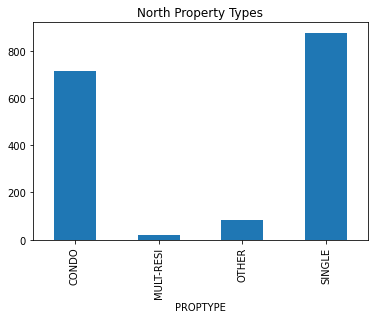

CENTRAL PROPTYPE
CONDO         4124
MULT-RESI      270
MULTI-COMM      56
OTHER         1561
SINGLE        1200
dtype: int64 



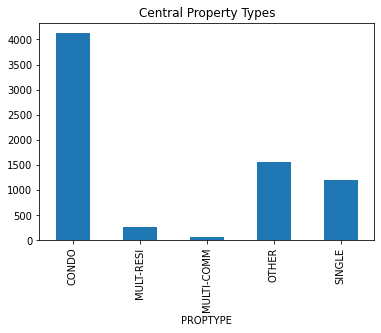

SOUTH PROPTYPE
CONDO           36
MULT-RESI       55
MULTI-COMM       4
OTHER          162
SINGLE        1414
dtype: int64 



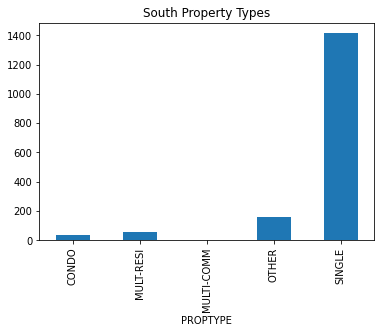

In [ ]:
#Property Types by area
areas = list(GROVE["AREA"].unique())

for var in areas:
  GROVE[GROVE["AREA"] == var].groupby("PROPTYPE").size().plot(kind='bar',title=var.lower().capitalize()+" Property Types")
  print(var,GROVE[GROVE["AREA"] == var].groupby("PROPTYPE").size(),"\n")
  plt.show()

Tax Assessed Values by Area for Condos and Single Family Homes

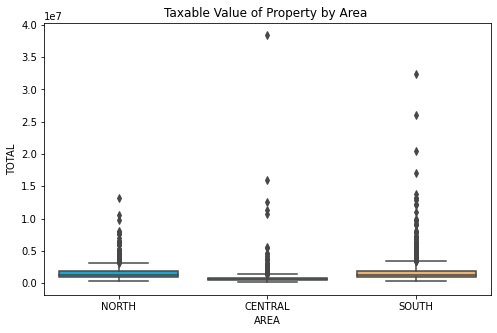

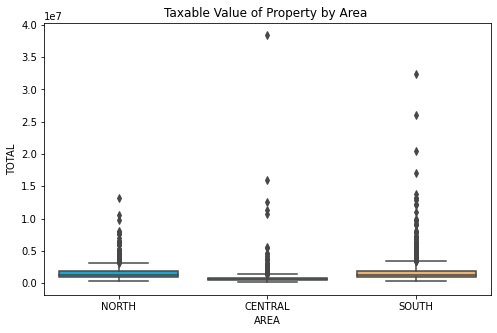

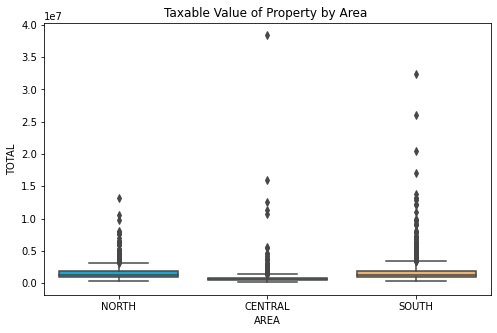

In [ ]:
# condoAndSingle = GROVE[np.logical_or(GROVE["PROPTYPE"]=="CONDO",GROVE["PROPTYPE"]=="SINGLE")]

areas = list(GROVE["AREA"].unique())

for var in areas:
  plt.figure(figsize=(8,5))
  sns.boxplot(x='AREA',y='TOTAL',data=SINGLE, palette='rainbow')
  plt.title("Taxable Value of Property by Area ")
  plt.show()

AVERAGE RESIDENTIAL PROPERTY BY AREA

In [ ]:
floatCols = ['LAND', 'BLDG', 'TOTAL', 'ASSESSED','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
            'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
             'LIVINGSQFT','ACTUALSQFT','MARKETVAL','LASTQSALEDT', 'LASTQSALEAMT']
objectCols = ['HEX','LANDUSE', 'ZONING','MAILINGSTATE', 'MAILINGCOUNTRY','XF1',
            'XF2', 'XF3','AREA','PROPTYPE', 'POOL', 'COMPANY']
areas = list(GROVE["AREA"].unique())

for area in areas:
  areaDF = GROVE[GROVE["AREA"]==area]

  avgDict = {}
  for var in floatCols:
    avgDict[var] = (areaDF[var].median())
  for var in objectCols:
    avgDict[var] = areaDF[var].value_counts().index[0]

  avgGrove = pd.DataFrame.from_dict(avgDict, orient='index',columns={"Central Value"})
  print(area.capitalize(),"\n",avgGrove,"\n")

North 
                                                   Central Value
LAND                                                   540000.0
BLDG                                                   148795.0
TOTAL                                                 1046857.5
ASSESSED                                               731345.5
ADJUSTEDSQFT                                             2474.5
LOTSIZE                                                  6011.0
BED                                                         3.0
BATH                                                        2.0
STORIES                                                     1.0
UNITS                                                       1.0
YEARBUILT                                                1979.0
EFFECTIVEYEARBUILT                                       1980.0
LIVINGSQFT                                               2424.0
ACTUALSQFT                                               2614.0
MARKETVAL                       

Summaries of Residential Property Values by Section

In [ ]:
#average sale price of property per year by area
SALES["LASTQSALEYEAR"] = SALES['LASTQSALEDT'].dt.year
maxSaleAmounts = SALES.sort_values("LASTQSALEYEAR",ascending=False).groupby(["LASTQSALEYEAR","AREA"],as_index=False)["LASTQSALEAMT"].mean().sort_values("LASTQSALEYEAR",ascending=False)
maxSaleAmountsSouth = maxSaleAmounts[maxSaleAmounts["AREA"]=="SOUTH"]
maxSaleAmountsNorth = maxSaleAmounts[maxSaleAmounts["AREA"]=="NORTH"]
maxSaleAmountsCentral = maxSaleAmounts[maxSaleAmounts["AREA"]=="CENTRAL"]

NameError: ignored

In [ ]:
import matplotlib.dates as mdates
import seaborn as sns

NameError: ignored

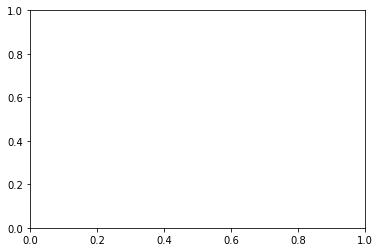

In [ ]:
#plot average sale price of property per year
# give examples of huge sales causing spikes in averages

fig, ax = plt.subplots()
ax.plot(maxSaleAmountsSouth.LASTQSALEYEAR,maxSaleAmountsSouth.LASTQSALEAMT,color="b",marker='o', label="South Grove")
ax.plot(maxSaleAmountsNorth.LASTQSALEYEAR,maxSaleAmountsNorth.LASTQSALEAMT,color="r",marker='o',label="North Grove")
ax.plot(maxSaleAmountsCentral.LASTQSALEYEAR,maxSaleAmountsCentral.LASTQSALEAMT,color="g",marker='o',label="Central Grove")
ax.legend()
sns.set_theme(palette="deep")
sns.axes_style()

ax.set_xlabel("Year")
fig.autofmt_xdate()

ax.ticklabel_format(axis='y')
ax.set_ylabel("Amount")

ax.set_title("Yearly Average Sale Price of Single Family Homes ")
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])

#look at master program for exporting to excel
# Output Data
# with pd.ExcelWriter(OUTPUT+"/"+Project+"STEP2DATA.xlsx", engine='xlsxwriter') as writer:
#   STEP2DATA.to_excel(writer, sheet_name="STEP2DATA", index=False, header=True)

## Output Data
# with pd.ExcelWriter(OUTPUT+"Allisons_Project.xlsx", engine='xlsxwriter') as writer:
#   INPUTDATA_HT_Data.to_excel(writer, sheet_name="INPUTDATA_HT_Data", index=False, header=True)
#   INPUT_STATE_POPBYRACE.to_excel(writer, sheet_name="INPUT_STATE_POPBYRACE", index=False, header=True)
#   INPUT_POVERTY.to_excel(writer, sheet_name="INPUT_POVERTY", index=False, header=True)
#   MERGED_DEMOGRAPHIC.to_excel(writer, sheet_name="MERGED_DEMOGRAPHIC", index=False, header=True)


In [ ]:
#average sale price per year
#avgSaleAmounts = sales.groupby("saleYear")["SALEAMT1"].describe()["mean"]
#avgSaleAmounts

In [ ]:
#plt.plot(avgSaleAmounts.index,avgSaleAmounts.values)
#plt.title("Average Sale Amount Per Year")
#going down in inverse correlation to interest rates at the end

SINGLE


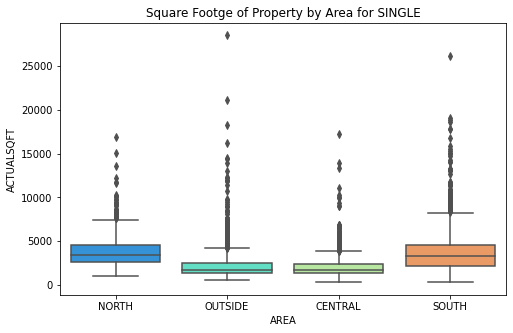

MULT-RESI


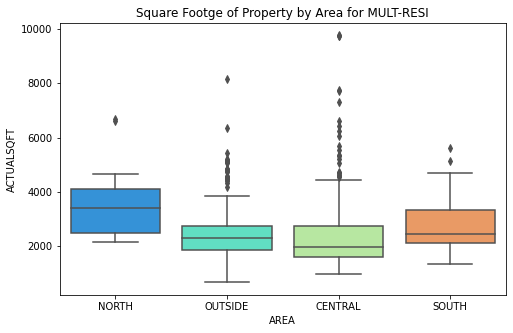

OTHER


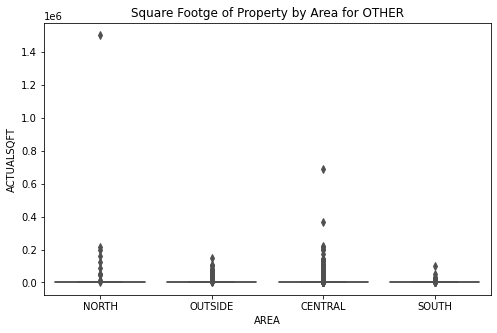

CONDO


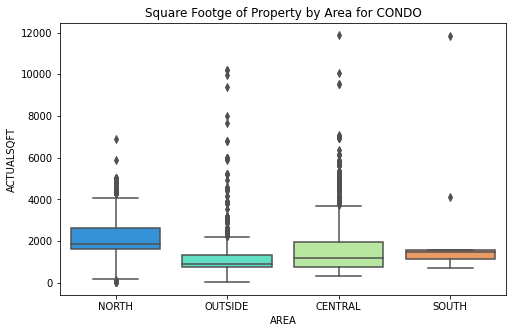

MULTI-COMM


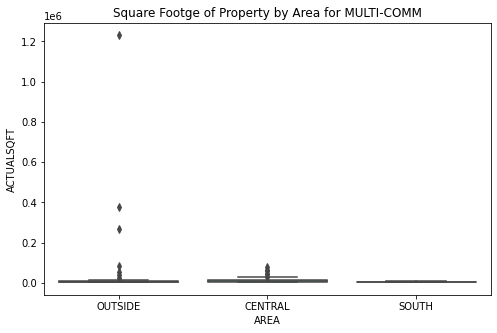

In [ ]:
for PROPTYPE in set(STEP2DATA["PROPTYPE"]):
  print(PROPTYPE)
  plt.figure(figsize=(8,5))
  sns.boxplot(x='AREA',y='ACTUALSQFT',data=STEP2DATA[STEP2DATA["PROPTYPE"]==PROPTYPE], palette='rainbow')
  plt.title("Square Footge of Property by Area for "+PROPTYPE)
  plt.show()


# Examples: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

SINGLE


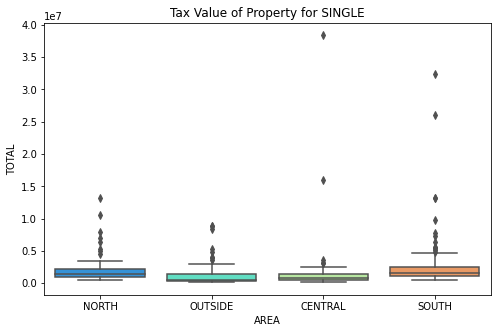

MULT-RESI


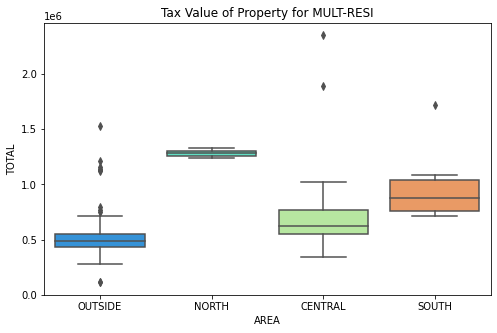

OTHER


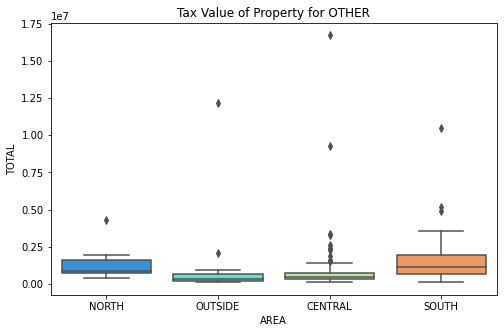

CONDO


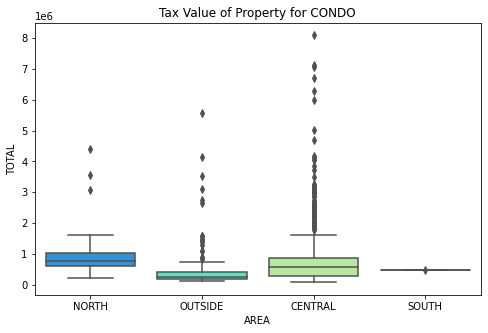

MULTI-COMM


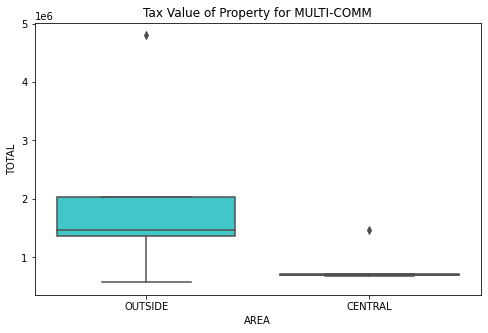

In [ ]:
RECENTSALES = STEP2DATA[STEP2DATA["LASTQSALEDT"]>=20210000]
for PROPTYPE in set(RECENTSALES["PROPTYPE"]):
  print(PROPTYPE)
  plt.figure(figsize=(8,5))
  sns.boxplot(x='AREA',y='TOTAL',data=RECENTSALES[RECENTSALES["PROPTYPE"]==PROPTYPE], palette='rainbow')
  plt.title("Tax Value of Property for "+PROPTYPE)
  plt.show()

  # Examples: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

SINGLE


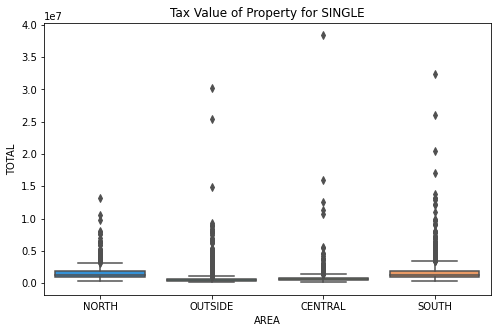

MULT-RESI


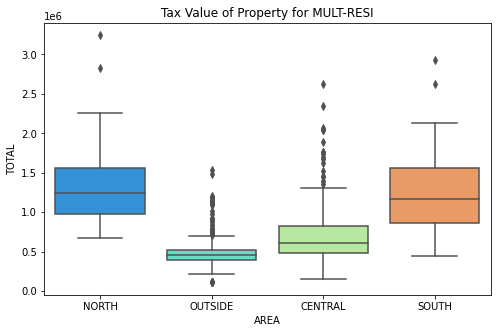

OTHER


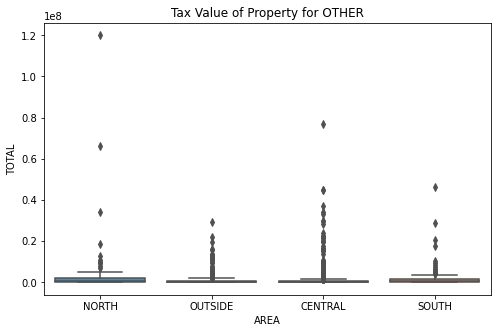

CONDO


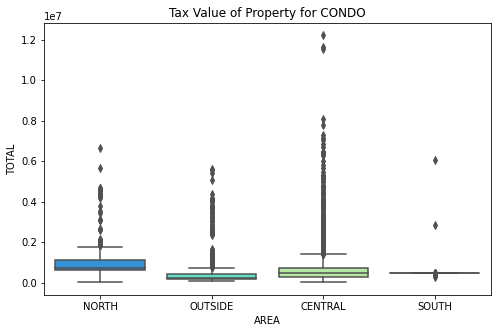

MULTI-COMM


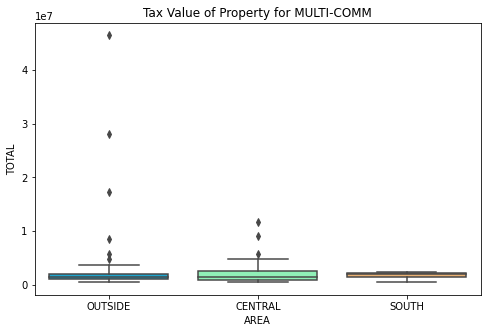

In [ ]:
for PROPTYPE in set(STEP2DATA["PROPTYPE"]):
  print(PROPTYPE)
  plt.figure(figsize=(8,5))
  sns.boxplot(x='AREA',y='TOTAL',data=STEP2DATA[STEP2DATA["PROPTYPE"]==PROPTYPE], palette='rainbow')
  plt.title("Tax Value of Property for "+PROPTYPE)
  plt.show()


# Examples: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

In [ ]:
pip install xlsxwriter

In [ ]:
with pd.ExcelWriter(OUTPUT+"/STEP2DATA_CoconutGrove.xlsx", engine='xlsxwriter') as writer:
  STEP2DATA.to_excel(writer, sheet_name="STEP2DATA", index=False, header=True)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AREA')

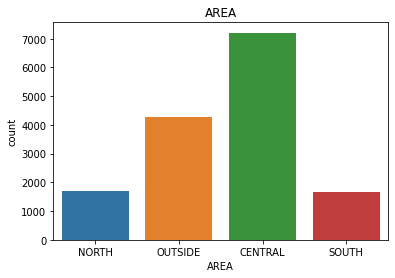

In [ ]:
sns.countplot(STEP2DATA["PROPTYPE"]).set_title("PROPTYPE")

In [ ]:
AREA = "CENTRAL"
PROPTYPE = "CONDO"

SUBSET = STEP2DATA[STEP2DATA["AREA"]==AREA]
SUBSET = SUBSET[SUBSET["PROPTYPE"]==PROPTYPE]

SUBSET.columns
NUMVARS = ['LAND', 'BLDG', 'TOTAL', 'ASSESSED', 'HEX','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
              'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
              'LIVINGSQFT','ACTUALSQFT', 'AREA', 'MARKETVAL','POOL', 'COMPANY',
              'LASTQSALEDT', 'LASTQSALEAMT']



In [ ]:
AREA = "CENTRAL"

SUBSET = STEP2DATA[STEP2DATA["AREA"]==AREA]
SUBSET = SUBSET[SUBSET["PROPTYPE"].isin(["CONDO","SINGLE"])]

# Example: https://seaborn.pydata.org/tutorial/axis_grids.html

sns.pairplot(SUBSET[["PROPTYPE"]+['LAND', 'BLDG', 'TOTAL']], hue="PROPTYPE", height=2.5)


In [ ]:
AREA = "CENTRAL"

SUBSET = STEP2DATA[STEP2DATA["AREA"]==AREA]
SUBSET = SUBSET[SUBSET["PROPTYPE"].isin(["CONDO","SINGLE"])]

# Example: https://seaborn.pydata.org/tutorial/axis_grids.html

sns.pairplot(SUBSET[["PROPTYPE"]+['LIVINGSQFT', 'LOTSIZE', 'BED',  'BATH', 'POOL']], hue="PROPTYPE", height=2.5)

In [ ]:
PROPTYPE = "SINGLE"

SUBSET = STEP2DATA[STEP2DATA["PROPTYPE"]==PROPTYPE]
SUBSET = SUBSET[SUBSET["AREA"].isin(["SOUTH","NORTH","CENTRAL"])]

# Example: https://seaborn.pydata.org/tutorial/axis_grids.html

sns.pairplot(SUBSET[["AREA"]+['LIVINGSQFT', 'LOTSIZE', 'BED',  'BATH', 'POOL']], hue="AREA", height=2.5)

In [ ]:
# https://www.instagram.com/miami.history/?hl=en

In [ ]:
NUMVARS = {'LAND', 'BLDG', 'HEX','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
              'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
              'POOL', 'COMPANY','LASTQSALEDT', 'LASTQSALEAMT'}
CATVARS = {"PROPTYPE","AREA"}

In [ ]:
MODELDATA1 = STEP2DATA[STEP2DATA["PROPTYPE"]=="SINGLE"]
MODELDATA1 = MODELDATA1[MODELDATA1["AREA"].isin(["SOUTH","NORTH","CENTRAL"])]
MODELDATA1 = MODELDATA1[CATVARS.union(NUMVARS)]
MODELDATA1["AREA_S"] = np.where(MODELDATA1["AREA"]=="SOUTH",1,0)
MODELDATA1["AREA_N"] = np.where(MODELDATA1["AREA"]=="NORTH",1,0)
MODELDATA1["YYYYMM"] = (MODELDATA1["LASTQSALEDT"]/10000).astype(int) + ((MODELDATA1["LASTQSALEDT"]/100).astype(int).mod(100)-1)/12
#=(INT(B1/100)+MOD(B1,100)/12)*100

NUMVARS = set(NUMVARS.union({"AREA_S","AREA_N","YYYYMM"}))
MODELDATA1

In [ ]:
MODELDATA2 = MODELDATA1[MODELDATA1["LASTQSALEDT"]>=20210000]
MODELDATA2

In [ ]:
plt.figure(figsize=(30,30))
corr = MODELDATA2[NUMVARS].corr()
sns.set_theme(style ='whitegrid')
heat_map = sns.heatmap(corr, square = False, annot = True)
heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':40} )

In [ ]:
NUMVARS

In [ ]:
#MODELVARS = ['ADJUSTEDSQFT', 'AREA_N', 'AREA_S', 'BATH', 'BED', 'BLDG', 'COMPANY', 'EFFECTIVEYEARBUILT', 'HEX', 'LAND',
# 'LOTSIZE', 'POOL', 'STORIES', 'UNITS', 'YEARBUILT', 'YYYYMM']

MODELVARS = ['ADJUSTEDSQFT', 'AREA_N', 'AREA_S', 'LOTSIZE','POOL', 'BED', 'YYYYMM']
MODELVARS = ['ADJUSTEDSQFT', 'LOTSIZE','POOL', 'BED', 'YYYYMM']
MODELVARS = ['LOTSIZE','POOL', 'BED', 'YYYYMM']

y = MODELDATA2["LASTQSALEAMT"]
X = MODELDATA2[MODELVARS]

In [ ]:
print(y.shape)
print(X.shape)

In [ ]:
print("Scatter Matrix:")

_ = pd.plotting.scatter_matrix(X, c=y, figsize = [20,20], s=300, marker='D')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape )

In [ ]:
print("Run Simple Linear Regression:")

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("Scoring Training Data:",reg_all.score(X_train, y_train))
print("Scoring Test Data:",reg_all.score(X_test, y_test))




In [ ]:
print(reg_all.intercept_, reg_all.coef_, reg_all.score(X, y))

In [ ]:
print("Intercept = ",reg_all.intercept_)
i = 0
for var in X_test.columns:
  print("Variable ",var," has coefficient ",reg_all.coef_[i])
  i = i + 1

In [ ]:
X_train

Classification Model

In [ ]:
SINGLE.columns

In [ ]:
NUMVARS = ['LAND', 'BLDG', 'HEX','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
              'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
              'POOL', 'COMPANY','LASTQSALEDT', 'LASTQSALEAMT']

X = SINGLE[NUMVARS]
y = SINGLE.HEX

print(X.shape)
print(y.shape)

In [ ]:
PROPTYPE = "SINGLE"

SUBSET = STEP2DATA[STEP2DATA["PROPTYPE"]==PROPTYPE]
SUBSET = SUBSET[SUBSET["AREA"].isin(["SOUTH","NORTH","CENTRAL"])]

# Example: https://seaborn.pydata.org/tutorial/axis_grids.html

sns.pairplot(SUBSET[["HEX"]+['LAND', 'BLDG','ADJUSTEDSQFT','LOTSIZE', 'BED', 'BATH', 'POOL','COMPANY','EFFECTIVEYEARBUILT']], hue="HEX", height=2.5)

In [ ]:
NUMVARS = {'LAND', 'BLDG', 'HEX','ADJUSTEDSQFT', 'LOTSIZE', 'BED',
              'BATH', 'STORIES', 'UNITS', 'YEARBUILT', 'EFFECTIVEYEARBUILT',
              'POOL', 'COMPANY','LASTQSALEDT', 'LASTQSALEAMT'}
CATVARS = {"PROPTYPE","AREA"}

MODELDATA1 = STEP2DATA[STEP2DATA["PROPTYPE"]=="SINGLE"]
MODELDATA1 = MODELDATA1[MODELDATA1["AREA"].isin(["SOUTH","NORTH","CENTRAL"])]
MODELDATA1 = MODELDATA1[CATVARS.union(NUMVARS)]
MODELDATA1["AREA_S"] = np.where(MODELDATA1["AREA"]=="SOUTH",1,0)
MODELDATA1["AREA_N"] = np.where(MODELDATA1["AREA"]=="NORTH",1,0)
MODELDATA1["YYYYMM"] = (MODELDATA1["LASTQSALEDT"]/10000).astype(int) + ((MODELDATA1["LASTQSALEDT"]/100).astype(int).mod(100)-1)/12
#=(INT(B1/100)+MOD(B1,100)/12)*100
MODELDATA1["HEXIND"] = np.where(MODELDATA1["HEX"]>0,1,0)
NUMVARS = set(NUMVARS.union({"AREA_S","AREA_N","YYYYMM"}))
MODELDATA1


In [ ]:
#test by removing and adding variables to see if it improves the ROC
MODELVARS = ['LAND','BLDG','ADJUSTEDSQFT', 'LOTSIZE','BED','BATH','STORIES',
              'YEARBUILT', 'EFFECTIVEYEARBUILT', 'POOL', 'COMPANY',
             'LASTQSALEDT', 'LASTQSALEAMT']

y = MODELDATA1["HEXIND"]
X = MODELDATA1[MODELVARS]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print("Run Logistic Regression:")
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

print("Analysing Results of Logistic Regression")

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

roc_auc_score(y_test, y_pred_prob)

print("Logistic Regression ROC Curve on TRAINING Data")
y_pred_prob = logreg.predict_proba(X_train)[:,1]

fpr, tpr, threshold = roc_curve(y_train,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

roc_auc_score(y_train, y_pred_prob)

print("Cross Validation")
cv_scores = cross_val_score(logreg, X,y, cv=10, scoring='roc_auc')
print(cv_scores)

In [ ]:
 print(logreg.intercept_, logreg.coef_, logreg.score(X, y))

In [ ]:
MODELVARS